In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../data/car.data.txt', header=None)
dataset.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Label Encoder

In [3]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [4]:
fit = dataset.apply(lambda x: d[x.name].ct(x))
# http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [5]:
fit.head()

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [6]:
X, Y = fit.values[:, :-1], fit.values[:, -1]

## Classifier

In [7]:
params = { 'n_estimators': 200, 'max_depth': 8, 'random_state': 2}
classifier = RandomForestClassifier(**params)
classifier.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

## Crossvalidation

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
acc = cross_val_score(classifier, X, Y, scoring='accuracy', cv=4)
print acc.mean()

0.765802360152


## Prediction

In [10]:
data = [['vhigh', 'vhigh', '2', '2', 'small', 'low']]
data = pd.DataFrame(data)

data.head()

,0,1,2,3,4,5
0,vhigh,vhigh,2,2,small,low


In [11]:
data = data.apply(lambda x: d[x.name].transform(x))
data.head()

,0,1,2,3,4,5
0,3,3,0,0,2,1


In [12]:
prediction = classifier.predict(data.values)

In [13]:
d[6].inverse_transform(prediction)

array(['unacc'], dtype=object)

## Validation curves

In [14]:
from sklearn.learning_curve import validation_curve

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [15]:
classifier = RandomForestClassifier()

param_grid = np.linspace(25, 200, 8).astype(int)
train_scores, val_scores = validation_curve(classifier, X, Y, 'n_estimators', param_grid, cv=5)

print "Param training scores"
print train_scores

print "Param val scores"
print val_scores

Param training scores
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
Param val scores
[[ 0.74855491  0.76011561  0.84104046  0.83815029  0.89534884]
 [ 0.75433526  0.7716763   0.78034682  0.84682081  0.89825581]
 [ 0.65606936  0.79768786  0.82369942  0.8583815   0.89825581]
 [ 0.6416185   0.78034682  0.81791908  0.8583815   0.89244186]
 [ 0.63294798  0.78323699  0.84104046  0.85549133  0.89825581]
 [ 0.72543353  0.7716763   0.82369942  0.8583815   0.89244186]
 [ 0.68786127  0.79190751  0.82947977  0.84104046  0.89825581]
 [ 0.65028902  0.79768786  0.80924855  0.8583815   0.89534884]]


## Curves

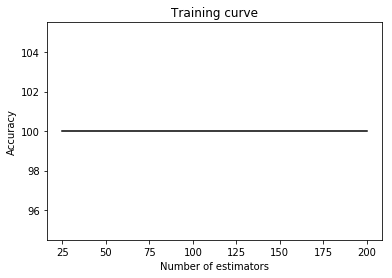

In [16]:
plt.figure()
plt.plot(param_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

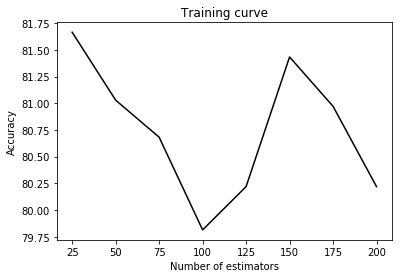

In [17]:
plt.figure()
plt.plot(param_grid, 100*np.average(val_scores, axis=1), color='black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()



### max_depth

In [18]:
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
param_grid = np.linspace(2, 10, 5).astype(int)
train_scores, val_scores = validation_curve(classifier, X, Y,
        "max_depth", param_grid, cv=5)
print 'Param: max_depth\nTraining scores:\n', train_scores
print 'Param: max_depth\nValidation scores:\n', val_scores

Param: max_depth
Training scores:
[[ 0.71852388  0.70043415  0.70043415  0.70043415  0.69942197]
 [ 0.80607815  0.80535456  0.80752533  0.79450072  0.81069364]
 [ 0.90665702  0.91027496  0.92836469  0.89797395  0.90679191]
 [ 0.97467438  0.96743849  0.96888567  0.97829233  0.96820809]
 [ 0.99421129  0.99710564  0.99782923  0.99855282  0.99277457]]
Param: max_depth
Validation scores:
[[ 0.69942197  0.69942197  0.69942197  0.69942197  0.70348837]
 [ 0.71098266  0.76589595  0.72543353  0.75722543  0.74127907]
 [ 0.71387283  0.76300578  0.7283237   0.84682081  0.84011628]
 [ 0.67630058  0.78612717  0.78034682  0.80346821  0.89825581]
 [ 0.6416185   0.76878613  0.75722543  0.84393064  0.88081395]]


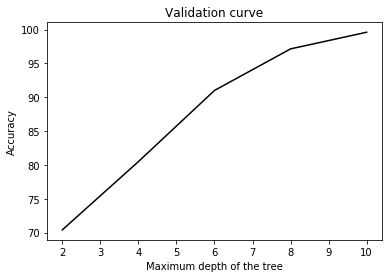

In [19]:
plt.figure()
plt.plot(param_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

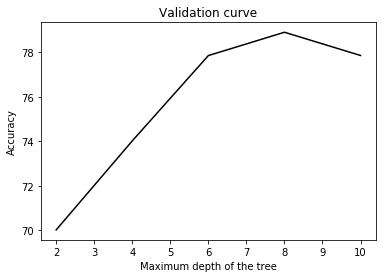

In [20]:
plt.figure()
plt.plot(param_grid, 100*np.average(val_scores, axis=1), color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

# Learning curves

In [21]:
from sklearn.learning_curve import learning_curve

In [22]:
classifier = RandomForestClassifier(random_state=7)

param_grid = np.array([200, 500, 800, 1100])

train_sizes, train_scores, val_scores = learning_curve(classifier, X, Y,
                                                        train_sizes=param_grid, cv=5)

In [23]:
print "Learning curves\n"
print "  Training scores: \n", train_scores
print "\n  Validation scores:\n", val_scores

Learning curves

  Training scores: 
[[ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          0.998       0.998       0.998     ]
 [ 0.99875     0.9975      0.99875     0.99875     0.99875   ]
 [ 0.99818182  0.99545455  0.99909091  0.99818182  0.99818182]]

  Validation scores:
[[ 0.69942197  0.69942197  0.69942197  0.69942197  0.70348837]
 [ 0.74855491  0.65028902  0.76878613  0.76589595  0.70348837]
 [ 0.70520231  0.78612717  0.52312139  0.76878613  0.77034884]
 [ 0.65028902  0.75433526  0.65317919  0.75433526  0.76744186]]


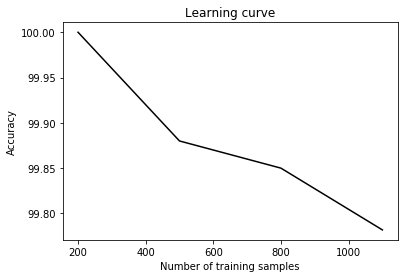

In [24]:
plt.figure()
plt.plot(param_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()